In [82]:
import pandas as pd
import csv
import sqlite3
from sqlite3 import connect
import folium
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
conn = sqlite3.connect("covid.db")
cursor = conn.cursor()

df = pd.read_csv('owid-covid-data.csv')
df.to_sql('covid', sqlite3.connect("covid.db"), if_exists='append', index = False)


0        8.33
1        8.33
2        8.33
3        8.33
4        8.33
         ... 
86431     NaN
86432     NaN
86433     NaN
86434     NaN
86435     NaN
Name: stringency_index, Length: 86436, dtype: float64

In [3]:
def covid(requete):
    df =pd.read_sql_query(requete, conn)
    print(df)

## How many countries are included in our data set?

In [4]:
nb_pays = covid("select count(distinct location ) as 'nombre de pays' from covid ")
nb_pays

   nombre de pays
0             219


## When was the most recent entry?

In [30]:
last_news = covid("SELECT DISTINCT date FROM covid ORDER BY date DESC LIMIT 1")
last_news

         date
0  2020-01-01


## What country had the highest single day deaths per million? 

In [6]:
death_day_countr = pd.read_sql_query("SELECT location, MAX(new_deaths_per_million), date FROM covid", conn)
death_day_countr

,location,max(new_deaths_per_million),date
0,Ecuador,218.329,2020-09-07


## Select any country. How many times have the deaths per million exceeded 1,000 in one day? 

In [22]:
country_death = pd.read_sql_query("SELECT COUNT(new_deaths) FROM covid WHERE location = 'France' AND new_deaths > 1000 GROUP BY date LIMIT 1", conn)
country_death

,count(new_deaths)
0,17


## Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

In [67]:
time_series_countries = pd.read_sql_query("SELECT DISTINCT(location), new_deaths_per_million, date FROM covid WHERE location IN ('France','United States','India') ORDER BY date DESC", conn)
df_nan = time_series_countries[time_series_countries.isna().any(axis =1)]
df_nan

,location,new_deaths_per_million,date
1269,India,NaN,2020-03-10
1272,India,NaN,2020-03-09
1275,India,NaN,2020-03-08
1278,India,NaN,2020-03-07
1281,India,NaN,2020-03-06
...,...,...,...
1400,United States,NaN,2020-01-25
1401,France,NaN,2020-01-24
1402,United States,NaN,2020-01-24
1403,United States,NaN,2020-01-23


In [68]:
time_series_countries

,location,new_deaths_per_million,date
0,France,3.214,2021-05-06
1,India,0.000,2021-05-06
2,United States,2.375,2021-05-06
3,India,2.837,2021-05-06
4,United States,2.384,2021-05-06
...,...,...,...
1400,United States,NaN,2020-01-25
1401,France,NaN,2020-01-24
1402,United States,NaN,2020-01-24
1403,United States,NaN,2020-01-23


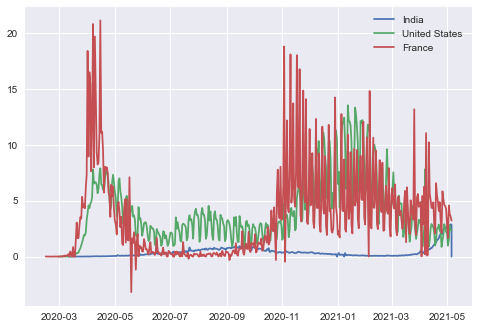

In [70]:
import matplotlib.pyplot as plt
import pandas
deaths_m_us_fr_ind['date']
country_set = set(time_series_countries['location'])
time_series_countries['date'] = pd.to_datetime(time_series_countries['date'])

plt.figure()
for country in country_set:
    selected_data = deaths_m_us_fr_ind.loc[time_series_countries['location'] == country]
    plt.plot(pd.to_datetime(selected_data['date']), selected_data['new_deaths_per_million'], label=country)
     
plt.legend()
plt.show()

## Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?

In [27]:
birthday_death_by_continent = pd.read_sql_query("SELECT DISTINCT(continent), new_deaths_per_million, new_cases_per_million FROM covid WHERE date == '2020-06-19' GROUP BY continent", conn)
birthday_death_by_continent

,continent,new_deaths_per_million,new_cases_per_million
0,None,0.196,7.330
1,Africa,0.319,2.714
2,Asia,0.051,8.888
3,Europe,1.042,17.374
4,North America,0.000,0.000
5,Oceania,0.000,0.078
6,South America,0.686,45.579


## Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?


In [43]:
stringency_i_countries = pd.read_sql_query("SELECT iso_code, location, avg(stringency_index) FROM covid WHERE location != 'World' and location != 'Europe' and location != 'North America' and location != 'South America' and location != 'Asia' and location != 'European Union' and location != 'Africa'  GROUP BY location", conn)
stringency_i_countries

,iso_code,location,avg(stringency_index)
0,AFG,Afghanistan,37.208023
1,ALB,Albania,63.117644
2,DZA,Algeria,72.021475
3,AND,Andorra,48.320972
4,AGO,Angola,70.222625
...,...,...,...
207,VEN,Venezuela,84.875157
208,VNM,Vietnam,60.746696
209,YEM,Yemen,33.778303
210,ZMB,Zambia,45.652482
